# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)        

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#Dictionary to hold target info from API
city_info = {"City":[], "Lat":[], "Lng":[], "Max Temp": [], "Humidity": [],
             "Cloudiness":[], "Wind Speed": [], "Country":[], "Date": []}

#Keeping count of API request
x, i = 1, 1

#Gathering data
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}").json()
        if city not in city_info:
            city_info["City"].append(response["name"])
            city_info["Lat"].append(response["coord"]["lat"])
            city_info["Lng"].append(response["coord"]["lon"])
            city_info["Max Temp"].append(response["main"]["temp_max"])
            city_info["Humidity"].append(response["main"]["humidity"])
            city_info["Cloudiness"].append(response["clouds"]["all"])
            city_info["Wind Speed"].append(response["wind"]["speed"])
            city_info["Country"].append(response["sys"]["country"])
            city_info["Date"].append(response["dt"])
            print(f"Processing Record {x} of Set {i} | {city}")
    except KeyError:
        print(f"City not found. Skipping... {city}")
    x += 1
    if x > 50:
        x = 1
        i += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | alihe
Processing Record 3 of Set 1 | egvekinot
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | anloga
Processing Record 7 of Set 1 | asau
Processing Record 8 of Set 1 | bay roberts
Processing Record 9 of Set 1 | ayagoz
Processing Record 10 of Set 1 | mana
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | new norfolk
City not found. Skipping... illoqqortoormiut
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | dandong
Processing Record 20 of Set 1 | charlestown
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | emmett
Processing Record 23 of Set 1 | ngunguru

Processing Record 50 of Set 4 | kitimat
Processing Record 1 of Set 5 | xiangfan
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | leeton
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | monte alegre
Processing Record 9 of Set 5 | angoche
Processing Record 10 of Set 5 | visnes
Processing Record 11 of Set 5 | nishihara
Processing Record 12 of Set 5 | ponta do sol
Processing Record 13 of Set 5 | itupiranga
Processing Record 14 of Set 5 | raudeberg
Processing Record 15 of Set 5 | smidovich
Processing Record 16 of Set 5 | leningradskiy
Processing Record 17 of Set 5 | tasiilaq
Processing Record 18 of Set 5 | cape town
Processing Record 19 of Set 5 | wayland
Processing Record 20 of Set 5 | shimoda
Processing Record 21 of Set 5 | colares
Processing Record 22 of Set 5 | bilibino
Processing Record 23 of Set 5 | coquimbo
Processin

Processing Record 1 of Set 9 | hambantota
Processing Record 2 of Set 9 | kibre mengist
Processing Record 3 of Set 9 | bella union
Processing Record 4 of Set 9 | esperance
Processing Record 5 of Set 9 | salta
Processing Record 6 of Set 9 | channapatna
Processing Record 7 of Set 9 | carbonia
Processing Record 8 of Set 9 | polunochnoye
Processing Record 9 of Set 9 | emerald
City not found. Skipping... tumannyy
Processing Record 11 of Set 9 | clyde river
Processing Record 12 of Set 9 | kapustin yar
Processing Record 13 of Set 9 | ozernovskiy
Processing Record 14 of Set 9 | meylan
Processing Record 15 of Set 9 | chimbote
Processing Record 16 of Set 9 | codrington
Processing Record 17 of Set 9 | shubarshi
Processing Record 18 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 9 | hokitika
Processing Record 20 of Set 9 | longyearbyen
Processing Record 21 of Set 9 | biggar
Processing Record 22 of Set 9 | belyy yar
Processing Record 23 of Set 9 | buala
Processing Record 24 of Set 

Processing Record 48 of Set 12 | bulancak
Processing Record 49 of Set 12 | iquitos
Processing Record 50 of Set 12 | ures
Processing Record 1 of Set 13 | sawang daen din
Processing Record 2 of Set 13 | ambatondrazaka
Processing Record 3 of Set 13 | gharo
City not found. Skipping... gazni
Processing Record 5 of Set 13 | azangaro
Processing Record 6 of Set 13 | weligama
Processing Record 7 of Set 13 | zhangjiakou
Processing Record 8 of Set 13 | northam
Processing Record 9 of Set 13 | lomovka
Processing Record 10 of Set 13 | vieste
Processing Record 11 of Set 13 | krasnogorsk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Create DataFrame
city_info_df = pd.DataFrame(city_info)

#Export to CSV
city_info_df.to_csv(output_data_file, index=False)

In [25]:
#Dispalying data sample
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,73.49,60,0,5.75,OM,1635133092
1,Alihe,50.5667,123.7167,49.14,43,8,6.06,CN,1635133293
2,Egvekinot,66.3167,-179.1667,2.08,87,20,7.31,RU,1635133180
3,Vaini,-21.2000,-175.2000,78.96,78,20,4.61,TO,1635133059
4,Yellowknife,62.4560,-114.3525,41.41,99,75,13.80,CA,1635133294
...,...,...,...,...,...,...,...,...,...
558,Zhangjiakou,40.8100,114.8794,55.20,41,100,2.59,CN,1635133525
559,Northam,51.0333,-4.2167,56.08,95,19,10.45,GB,1635133525
560,Lomovka,53.9194,58.3672,36.52,93,100,1.19,RU,1635133525
561,Vieste,41.8825,16.1750,50.50,62,49,4.94,IT,1635133526


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#Removing city and country. not needed for summary of data
cut_df = city_info_df.drop(columns=["City", "Country"])

summary = {}

#Creating summar table
for column in cut_df.columns:
    summary[column] = [cut_df[column].count(),
                         cut_df[column].mean(),
                         cut_df[column].std(),
                         cut_df[column].min(),
                         cut_df[column].quantile(.25),
                         cut_df[column].quantile(.50),
                         cut_df[column].quantile(.75),
                         cut_df[column].max()]
summary_df = pd.DataFrame(summary)
index_names = {0:'count', 1:'mean', 2:'std', 3:'min', 4:'25%', 5:'50%', 6:'75%', 7:'max'}
summary_df = summary_df.rename(index=index_names)
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.651585,16.066630,60.132611,72.792185,56.216696,7.434369,1.635133e+09
std,32.929112,90.843911,20.521978,19.653524,39.396686,5.758632,1.370885e+02
min,-54.800000,-179.166700,-16.130000,14.000000,0.000000,0.000000,1.635133e+09
25%,-6.776700,-61.711050,47.595000,61.000000,15.000000,3.090000,1.635133e+09
50%,22.075200,19.026600,64.220000,76.000000,71.000000,6.080000,1.635133e+09
75%,47.174350,92.730000,76.855000,89.000000,96.000000,10.435000,1.635133e+09
max,78.218600,178.416700,93.250000,100.000000,100.000000,47.530000,1.635134e+09


In [27]:
#  Get the indices of cities that have humidity over 100%.
humidity = cut_df[cut_df["Humidity"] >= 100]
humidity.index

Int64Index([37, 102, 134, 145, 173, 236, 257, 318, 527], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = cut_df.drop(humidity.index)
clean_city_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,17.0151,54.0924,73.49,60,0,5.75,1635133092
1,50.5667,123.7167,49.14,43,8,6.06,1635133293
2,66.3167,-179.1667,2.08,87,20,7.31,1635133180
3,-21.2000,-175.2000,78.96,78,20,4.61,1635133059
4,62.4560,-114.3525,41.41,99,75,13.80,1635133294
...,...,...,...,...,...,...,...
558,40.8100,114.8794,55.20,41,100,2.59,1635133525
559,51.0333,-4.2167,56.08,95,19,10.45,1635133525
560,53.9194,58.3672,36.52,93,100,1.19,1635133525
561,41.8825,16.1750,50.50,62,49,4.94,1635133526


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

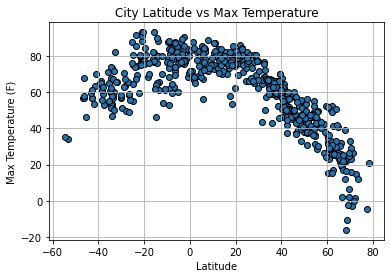

In [29]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

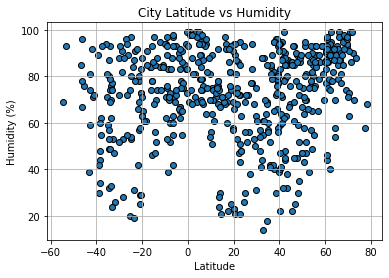

In [30]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

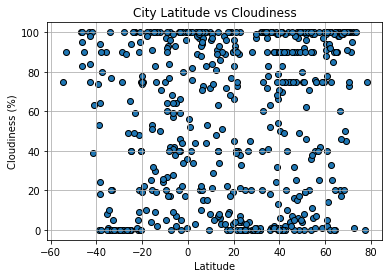

In [31]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

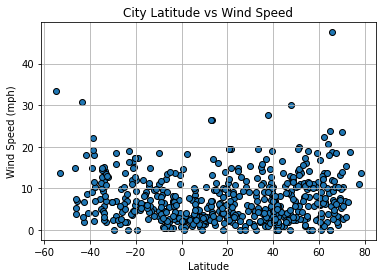

In [32]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [33]:
north_hem = clean_city_data[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8935083152615663


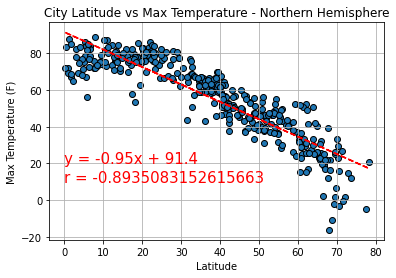

In [34]:
#linear regression model
nt_temp_slope, nt_temp_int, nt_temp_r, nt_temp_p, nt_temp_std_err = linregress(north_hem["Lat"],north_hem["Max Temp"])
nt_temp_fit = nt_temp_slope * north_hem["Lat"] + nt_temp_int
print(f"The r-value is: {nt_temp_r}")

plt.scatter(north_hem["Lat"],north_hem["Max Temp"],edgecolors="black")
plt.title("City Latitude vs Max Temperature - Northern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
nt_temp_line_eq = "y = " + str(round(nt_temp_slope,2)) + "x + " + str(round(nt_temp_int,2))
plt.annotate(nt_temp_line_eq,(0,20),fontsize=15,color="red")
plt.annotate(('r = ' + str(nt_temp_r)),(0,10),fontsize=15,color="red")
plt.plot(north_hem["Lat"], nt_temp_fit, "r--")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6270666052254666


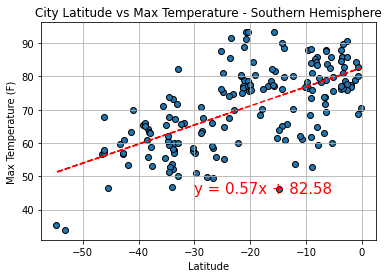

In [35]:
#linear regression model
st_temp_slope, st_temp_int, st_temp_r, st_temp_p, st_temp_std_err = linregress(south_hem["Lat"],south_hem["Max Temp"])
st_temp_fit = st_temp_slope * south_hem["Lat"] + st_temp_int
print(f"The r-value is: {st_temp_r}")

#Scatter plot
plt.scatter(south_hem["Lat"],south_hem["Max Temp"],edgecolors="black")
plt.title("City Latitude vs Max Temperature - Southern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
st_temp_line_eq = "y = " + str(round(st_temp_slope,2)) + "x + " + str(round(st_temp_int,2))
plt.annotate(st_temp_line_eq,(-30,45),fontsize=15,color="red")
plt.plot(south_hem["Lat"], st_temp_fit, "r--")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14402413166296849


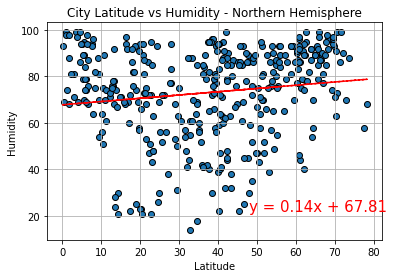

In [36]:
#linear regression
nt_hum_slope, nt_hum_int, nt_hum_r, nt_hum_p, nt_hum_std_err = linregress(north_hem["Lat"],north_hem["Humidity"])
nt_hum_fit = nt_hum_slope * north_hem["Lat"] + nt_hum_int
print(f"The r-value is: {nt_hum_r}")

#Scatter plot
plt.scatter(north_hem["Lat"],north_hem["Humidity"],edgecolors="black")
plt.title("City Latitude vs Humidity - Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
nt_hum_line_eq = "y = " + str(round(nt_hum_slope,2)) + "x + " + str(round(nt_hum_int,2))
plt.annotate(nt_hum_line_eq,(48,22),fontsize=15,color="red")
plt.plot(north_hem["Lat"], nt_hum_fit, "r--")
plt.grid()
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20587611217229984


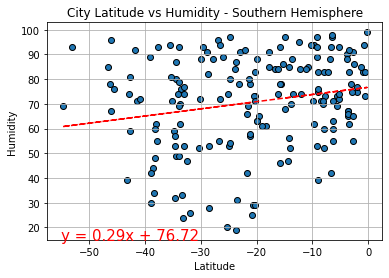

In [37]:
#Linear Regression
st_hum_slope, st_hum_int, st_hum_r, st_hum_p, st_hum_std_err = linregress(south_hem["Lat"],south_hem["Humidity"])
st_hum_fit = st_hum_slope * south_hem["Lat"] + st_hum_int
print(f"The r-value is: {st_hum_r}")

#Scatter plot
plt.scatter(south_hem["Lat"],south_hem["Humidity"],edgecolors="black")
plt.title("City Latitude vs Humidity - Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
st_hum_line_eq = "y = " + str(round(st_hum_slope,2)) + "x + " + str(round(st_hum_int,2))
plt.annotate(st_hum_line_eq,(-55,15),fontsize=15,color="red")
plt.plot(south_hem["Lat"], st_hum_fit, "r--")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11600049540775065


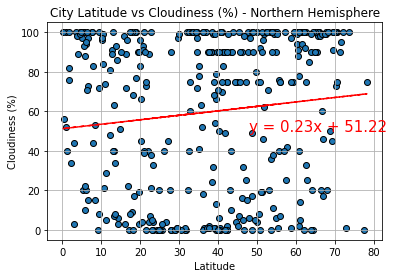

In [38]:
#linear regression
nt_cloud_slope, nt_cloud_int, nt_cloud_r, nt_cloud_p, nt_cloud_std_err = linregress(north_hem["Lat"],north_hem["Cloudiness"])
nt_cloud_fit = nt_cloud_slope * north_hem["Lat"] + nt_cloud_int
print(f"The r-value is: {nt_cloud_r}")

#Scatter plot
plt.scatter(north_hem["Lat"],north_hem["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs Cloudiness (%) - Northern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
nt_cloud_line_eq = "y = " + str(round(nt_cloud_slope,2)) + "x + " + str(round(nt_cloud_int,2))
plt.annotate(nt_cloud_line_eq,(48,50),fontsize=15,color="red")
plt.plot(north_hem["Lat"], nt_cloud_fit, "r--")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08111677916569665


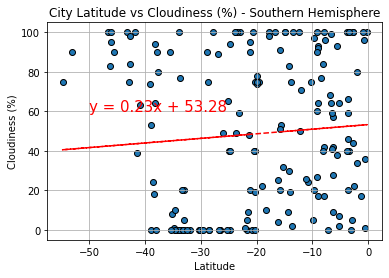

In [39]:
#linear regression
st_cloud_slope, st_cloud_int, st_cloud_r, st_cloud_p, st_cloud_std_err = linregress(south_hem["Lat"],south_hem["Cloudiness"])
st_cloud_fit = st_cloud_slope * south_hem["Lat"] + st_cloud_int
print(f"The r-value is: {st_cloud_r}")

#Scatter plot
plt.scatter(south_hem["Lat"],south_hem["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs Cloudiness (%) - Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
st_cloud_line_eq = "y = " + str(round(st_cloud_slope,2)) + "x + " + str(round(st_cloud_int,2))
plt.annotate(st_cloud_line_eq,(-50,60),fontsize=15,color="red")
plt.plot(south_hem["Lat"], st_cloud_fit, "r--")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22093579122914567


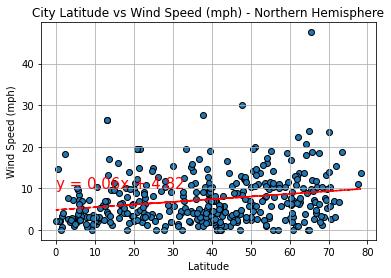

In [40]:
#linear regression
nt_wind_slope, nt_wind_int, nt_wind_r, nt_wind_p, nt_wind_std_err = linregress(north_hem["Lat"],north_hem["Wind Speed"])
nt_wind_fit = nt_wind_slope * north_hem["Lat"] + nt_wind_int
print(f"The r-value is: {nt_wind_r}")

#Scatter plot
plt.scatter(north_hem["Lat"],north_hem["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs Wind Speed (mph) - Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
nt_wind_line_eq = "y = " + str(round(nt_wind_slope,2)) + "x + " + str(round(nt_wind_int,2))
plt.annotate(nt_wind_line_eq,(0,10),fontsize=15,color="red")
plt.plot(north_hem["Lat"], nt_wind_fit, "r--")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.34314110703921863


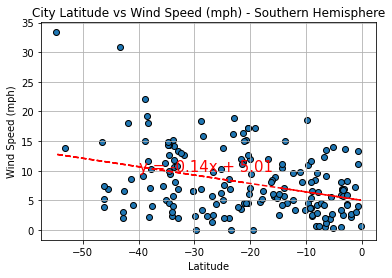

In [41]:
#linear regression
st_wind_slope, st_wind_int, st_wind_r, st_wind_p, st_wind_std_err = linregress(south_hem["Lat"],south_hem["Wind Speed"])
st_wind_fit = st_wind_slope * south_hem["Lat"] + st_wind_int
print(f"The r-value is: {st_wind_r}")

#Scatter plot
plt.scatter(south_hem["Lat"],south_hem["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs Wind Speed (mph) - Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
st_wind_line_eq = "y = " + str(round(st_wind_slope,2)) + "x + " + str(round(st_wind_int,2))
plt.annotate(st_wind_line_eq,(-40,10),fontsize=15,color="red")
plt.plot(south_hem["Lat"], st_wind_fit, "r--")
plt.grid()
plt.show()